In [4]:
#项目2-项目实施代码

#导入pandas与numpy库
import pandas as pd
import numpy as np

#读取数据并将数据集进行分离，拆分为特征变量（data）与标签（target）
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)
print(raw_df)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]

#将特征变量（data）与标签（target）分别赋值给x和y
x,y=data,target

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

In [2]:
#使用3种回归方法训练模型
#导入3种模型及划分样本函数
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt

#分割训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3) 

#定义各种线性回归对象
lr= LinearRegression()
rd=Ridge()
ls=Lasso()
models=[lr,rd,ls]
names=['Linear','Ridge','Lasso']

#分别训练模型并进行回归，计算准确率
for model,name in zip(models,names):
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    print("%s模型的预测准确率为：%.5f"%(name,score))
    

Linear模型的预测准确率为：0.78363
Ridge模型的预测准确率为：0.78905
Lasso模型的预测准确率为：0.66948


Linear模型的最大预测准确率为：0.78363
Ridge模型的最大预测准确率为：0.78905
Lasso模型的最大预测准确率为：0.78573


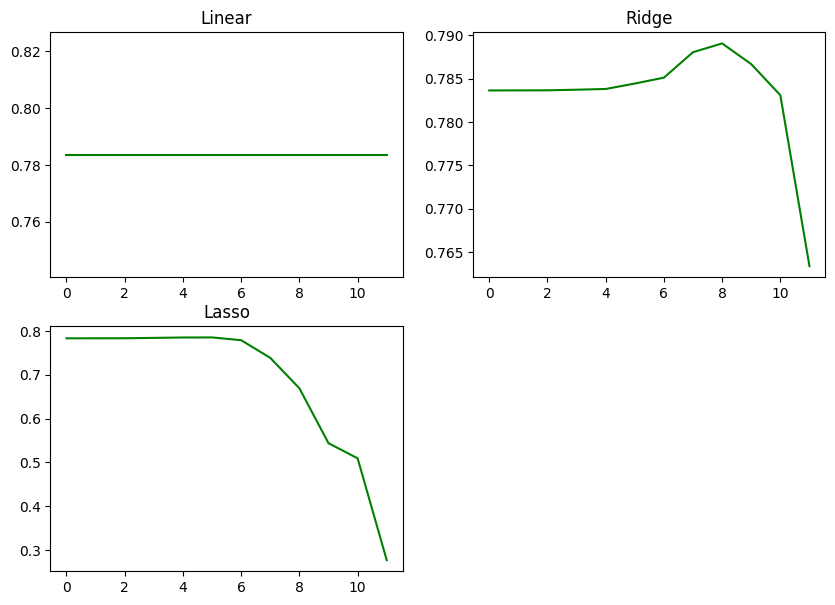

In [3]:
#测试alpha在不同取值下的回归效果
scores=[]
alphas=[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50]
for index,model in enumerate(models):
    scores.append([])
    for alpha in alphas:
        if index>0:
            model.alpha=alpha
        model.fit(x_train,y_train)
        scores[index].append(model.score(x_test,y_test))
        
#绘制结果图
fig=plt.figure(figsize=(10,7))
for i,name in enumerate(names):
    plt.subplot(2,2,i+1)
    plt.plot(range(len(alphas)),scores[i],'g-')
    plt.title(name)
    print('%s模型的最大预测准确率为：%.5f'%(name,max(scores[i])))
plt.show()